In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

#set a hgh width for the plots
plt.rcParams['figure.figsize'] = [15, 10]


In [15]:
df = pd.read_csv("income.csv", sep = ";" )
df["Cumulative Percentage"] = df["Percent of total"]
df = df.replace(",", "", regex = True)


In [16]:
#trasform df["Percent of total"] from a cumulative percentage to a percentage of total
for i in range(1, len(df)):
    df["Percent of total"][i] = df["Cumulative Percentage"][i] - df["Cumulative Percentage"][i-1]

df = df[["int_1", "int_2", "Number", "Percent of total", "Cumulative Percentage", "Average amount"]]

#rename columns
df = df.rename(columns = {"int_1": "bound_low", "int_2": "bound_high", "Number": "number", "Percent of total": "percent", "Cumulative Percentage" : "percent_cumul", "Average amount": "average_amount"})

df["bound_low"] = df["bound_low"].astype(float)
df["bound_high"] = df["bound_high"].astype(float)

In [17]:
df

,bound_low,bound_high,number,percent,percent_cumul,average_amount
0,0.01,4.999990e+03,17719251,10.30004,10.30004,2106.46
1,5000.00,9.999990e+03,11166330,6.49088,16.79092,7392.23
2,10000.00,1.499999e+04,9688022,5.63156,22.42248,12447.97
3,15000.00,1.999999e+04,9004758,5.23438,27.65686,17469.18
4,20000.00,2.499999e+04,8731938,5.07580,32.73266,22501.22
5,25000.00,2.999999e+04,9047502,5.25923,37.99189,27505.18
6,30000.00,3.499999e+04,9607391,5.58469,43.57658,32487.61
7,35000.00,3.999999e+04,9502181,5.52353,49.10011,37474.46
8,40000.00,4.499999e+04,8867642,5.15468,54.25479,42452.58
9,45000.00,4.999999e+04,8067856,4.68977,58.94456,47457.13


In [266]:
#pick a random row with a probability equal to the percent column
def pick_random_row(df, percent_cumul_limit_low = 0, percent_cumul_limit_high = 100):

    df1 = df[(df["percent_cumul"] >= percent_cumul_limit_low) & (df["percent_cumul"] <= percent_cumul_limit_high)]

    #df1["percent"] now not sums to 100. make it so in df1
    df1["percent"] = df1["percent"]/(df1["percent"].sum())

    #print(df1)
    return np.random.choice(df1.index, p = df1["percent"])

#pick a random amount between the lower and upper bound of a row picked with pick_random_row
def pick_random_amount(df, row):
    return np.random.uniform(df["bound_low"][row], df["bound_high"][row])


In [92]:
a = []
j = 0
while (j < 10000):
    row =(pick_random_row(df))
    income = pick_random_amount(df, row)
    a.append(income)
    j += 1

a = sorted(a, reverse=True)


In [93]:
a

[8794513.39454114,
 7125005.178336108,
 7082394.201830043,
 2032043.1902287311,
 1989850.3393719902,
 1732951.279882343,
 1514667.3937532718,
 1407487.5463227013,
 1380785.4948559522,
 1273220.1451895158,
 1076071.8510783708,
 1063135.2832880348,
 1057554.598540896,
 1006338.1726263049,
 999565.8162432017,
 993411.8795434872,
 991316.6247337853,
 982164.1555717139,
 977531.3625497409,
 936708.9187387094,
 931118.6890566081,
 926058.5035420265,
 907850.4875024051,
 904299.149359229,
 904159.9094518129,
 898100.7772155233,
 882940.661689367,
 865733.3533422572,
 852325.6457739406,
 807166.438720282,
 791565.9591569086,
 789565.811368759,
 789496.6401093303,
 786507.4711711581,
 773792.5030897707,
 768031.9877976855,
 758755.8222321641,
 740623.5053593928,
 731607.5175945048,
 722110.0441601289,
 718589.4241632072,
 707109.9678141809,
 702363.5078302082,
 695859.7114288189,
 691041.8398488774,
 684923.5180750777,
 666116.9459028781,
 664072.5030788063,
 663685.9727982014,
 662563.76823965

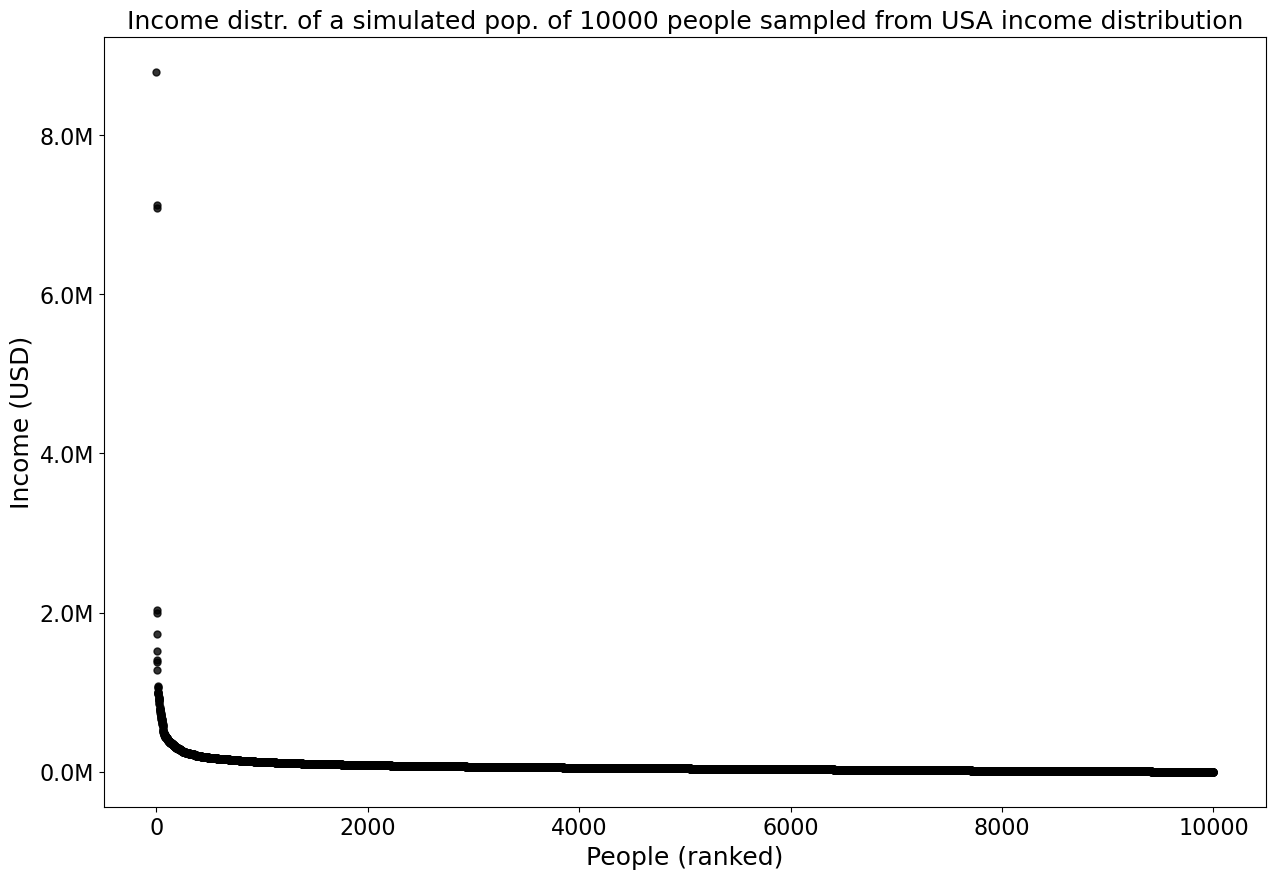

In [106]:
def millions_formatter(x, pos):
    return f'{x / 1000000}M'

fig, ax = plt.subplots()
#plot a with points
plt.plot(a, 'o', markersize=5, alpha=0.8, color='black')

plt.title("Income distr. of a simulated pop. of" + " " + str(len(a)) + " " + "people sampled from USA income distribution", fontsize=18)
plt.xlabel("People (ranked)", fontsize=18)
plt.ylabel("Income (USD)", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#loglog plot
#plt.loglog()

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))




